In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
dados = {'consumo de energia' : [1000,3000,1500,2500,1200,3500],
        'tempo de operacao' : [200,500,300,400,250,600],
        'tipo de energia' : ["eletrica", "gas", "eletrica", "gas", "eletrica", "gas"],
        'classificacao' : ["eficiente", "ineficiente", "eficiente", "ineficiente", "eficiente", "ineficiente"]
}

In [12]:
df = pd.DataFrame(dados)
tipo = LabelEncoder()
classe = LabelEncoder()

In [13]:
df['tipo de energia'] = tipo.fit_transform(df['tipo de energia']) 
df['classificacao'] = classe.fit_transform(df['classificacao']) 

In [14]:
x = df[['consumo de energia', 'tempo de operacao', 'tipo de energia']]
y = df['classificacao']

In [15]:
modelo = DecisionTreeClassifier(criterion='entropy')
modelo.fit(x,y)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [16]:
arvore = export_text(modelo, feature_names=list(x.columns))
print(arvore)

|--- tempo de operacao <= 350.00
|   |--- class: 0
|--- tempo de operacao >  350.00
|   |--- class: 1



In [32]:
nova_maquina = [[900,900,tipo.transform(['eletrica'])[0]]]
previsao = modelo.predict(nova_maquina)
print(previsao)

[1]


C:\Users\dsadm\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


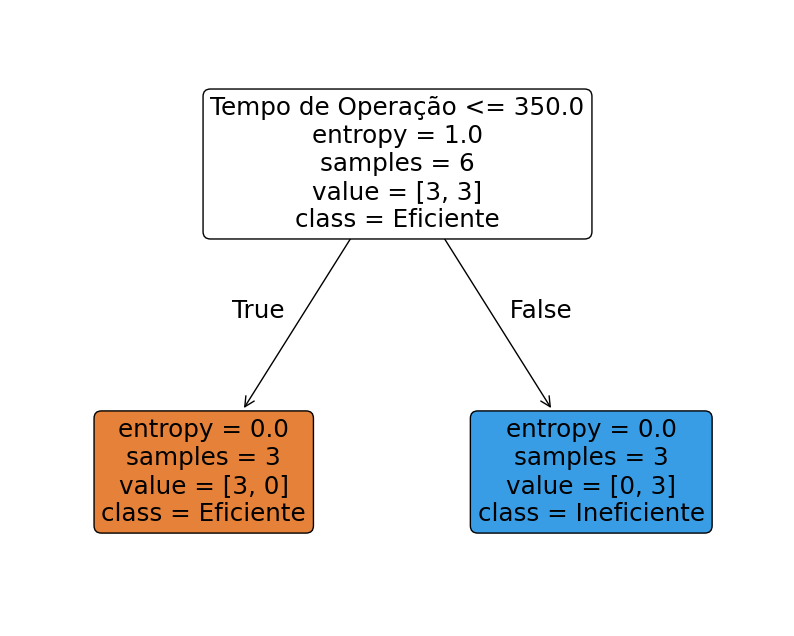

In [33]:
plt.figure(figsize=(10,8))
tree.plot_tree(
    modelo,
    feature_names=["Consumo de Energia", "Tempo de Operação", "Tipo de Energia", "Classificação"],
    class_names=["Eficiente", "Ineficiente"],
    filled=True,
    rounded=True
)
plt.show()